## Laboratorio Benchmark
Mineria Para Grandes Volumenes de Información

Universidad EAFIT


2025-2

Integrantes:

*   Paula Pirela
*   Carlos Baez
*   Manuela Ramos











Importar librerias a utilizar:

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import re
import ast

Importar datos a utilizar

In [39]:
RUTA_LOGS = '/content/drive/MyDrive/Resultados'

In [40]:
regex_tiempo = re.compile(r'Execution time:\s*([\d\.]+)\s*seconds')
regex_lista = re.compile(r'\[\([^\]]+\)\]')

In [49]:
def procesar_logs_multi_formato_final_robusto_reform(ruta_carpeta_principal):
    lista_registros = []
    ruta_norm = os.path.normpath(ruta_carpeta_principal)
    profundidad_base = len(ruta_norm.split(os.sep))

    PATRON_TIEMPO = r"Execution time:\s*(\d+\.\d+) seconds"

    for ruta_actual, directorios, archivos in os.walk(ruta_carpeta_principal):

        ruta_actual_norm = os.path.normpath(ruta_actual)
        componentes_ruta = ruta_actual_norm.split(os.sep)
        profundidad_actual = len(componentes_ruta)

        nombre_subcarpeta_1 = pd.NA
        nombre_subcarpeta_2 = pd.NA
        nombre_subcarpeta_3 = pd.NA

        if profundidad_actual > profundidad_base:
            nombre_subcarpeta_1 = componentes_ruta[profundidad_base]
        if profundidad_actual > profundidad_base + 1:
            nombre_subcarpeta_2 = componentes_ruta[profundidad_base + 1]
        if profundidad_actual > profundidad_base + 2:
            nombre_subcarpeta_3 = componentes_ruta[profundidad_base + 2]

        for nombre_archivo in archivos:

            if nombre_archivo.endswith('.log'):

                ruta_completa_archivo = os.path.join(ruta_actual, nombre_archivo)

                registro = {
                    'Subcarpeta_1': nombre_subcarpeta_1,
                    'Subcarpeta_2': nombre_subcarpeta_2,
                    'Subcarpeta_3': nombre_subcarpeta_3,
                    'Archivo_Origen': nombre_archivo
                }

                with open(ruta_completa_archivo, 'r', encoding='utf-8') as archivo:
                    contenido_completo = archivo.read()

                    match_tiempo = re.search(PATRON_TIEMPO, contenido_completo)
                    registro['Execution time'] = float(match_tiempo.group(1)) if match_tiempo else None

                    valores_match = re.search(r"(\[.*\]|\{.*\})", contenido_completo, re.DOTALL)

                    datos_extraidos = {}

                    if valores_match:
                        valores_str = valores_match.group(1).strip()
                        valores_str = valores_str.strip()

                        if valores_str.startswith('{') and valores_str.endswith('}'):
                            datos_extraidos = ast.literal_eval(valores_str)

                        elif valores_str.startswith('[') and valores_str.endswith(']'):
                            lista_de_tuplas = ast.literal_eval(valores_str)
                            datos_extraidos = {str(k): v for k, v in dict(lista_de_tuplas).items()}

                        registro.update(datos_extraidos)

                    lista_registros.append(registro)

    if lista_registros:
        df_final = pd.DataFrame(lista_registros)
        return df_final
    else:
        return pd.DataFrame()

In [50]:
df_logs_procesados = procesar_logs_multi_formato_final_robusto_reform(RUTA_LOGS)

# Mostrar el resultado
print("-" * 50)
print("DataFrame Final (Estructura y Datos):")
print(df_logs_procesados)
print("-" * 50)

--------------------------------------------------
DataFrame Final (Estructura y Datos):
   Subcarpeta_1 Subcarpeta_2 Subcarpeta_3    Archivo_Origen  Execution time  \
0      ex-spark          20k           15        output.log      167.368797   
1      ex-spark          20k            5        output.log       96.889935   
2      ex-spark          20k           10        output.log      150.461018   
3      ex-spark           5k            5        output.log       76.455459   
4      ex-spark           5k           15        output.log      176.832977   
5      ex-spark           5k           10        output.log      124.811323   
6      ex-spark          10k           15        output.log      192.783033   
7      ex-spark          10k           10    output (1).log      144.142609   
8      ex-spark          10k            5        output.log       92.016242   
9     ex-python          10k            5    output - 5.log       28.147394   
10    ex-python          10k           15 

In [51]:
df_logs_procesados

,Subcarpeta_1,Subcarpeta_2,Subcarpeta_3,Archivo_Origen,Execution time,2,4,5
0,ex-spark,20k,15,output.log,167.368797,70804425,88499352,17696223
1,ex-spark,20k,5,output.log,96.889935,23595069,29504635,5900296
2,ex-spark,20k,10,output.log,150.461018,47195387,59002879,11801734
3,ex-spark,5k,5,output.log,76.455459,22394769,28008227,5597004
4,ex-spark,5k,15,output.log,176.832977,67201555,84010226,16788219
5,ex-spark,5k,10,output.log,124.811323,44803133,56000426,11196441
6,ex-spark,10k,15,output.log,192.783033,70805972,88503501,17690527
7,ex-spark,10k,10,output (1).log,144.142609,47197130,59005544,11797326
8,ex-spark,10k,5,output.log,92.016242,23597646,29505843,5896511
9,ex-python,10k,5,output - 5.log,28.147394,23597646,29505843,5896511


Funcion para renombrar las columnas de los archivos:

In [52]:
def renombrar_columnas(df):
    df = df.rename(columns={
        'Subcarpeta_1': 'experimento',
        'Subcarpeta_2': 'cantidad_registros',
        'Subcarpeta_3': 'gigabytes',
        'Execution time': 'tiempo_de_ejecucion'
    })

    df['cantidad_registros'] = pd.to_numeric(df['cantidad_registros'], errors='coerce')
    df['gigabytes'] = pd.to_numeric(df['gigabytes'], errors='coerce')
    df['tiempo_de_ejecucion'] = pd.to_numeric(df['tiempo_de_ejecucion'], errors='coerce')

    return df

In [67]:
def generar_grafica_comparativa(df):
    df_promedio = df.groupby('experimento', as_index=False)['tiempo_de_ejecucion'].mean()

    plt.figure(figsize=(10, 6))

    ax = sns.barplot(
        x='experimento',
        y='tiempo_de_ejecucion',
        data=df_promedio,
        palette='Set1'
    )

    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.2f'), # Formato a 2 decimales
            (p.get_x() + p.get_width() / 2., p.get_height()), # Posición (centro de la barra, altura)
            ha = 'center',
            va = 'center',
            xytext = (0, 9), # Desplazamiento vertical para posicionar la etiqueta
            textcoords = 'offset points',
            fontsize = 10
        )

    plt.title('Tiempo Promedio de Ejecución por Experimento', fontsize=14)
    plt.xlabel('Experimento', fontsize=12)
    plt.ylabel('Tiempo Promedio de Ejecución (segundos)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()

/tmp/ipython-input-4030152856.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


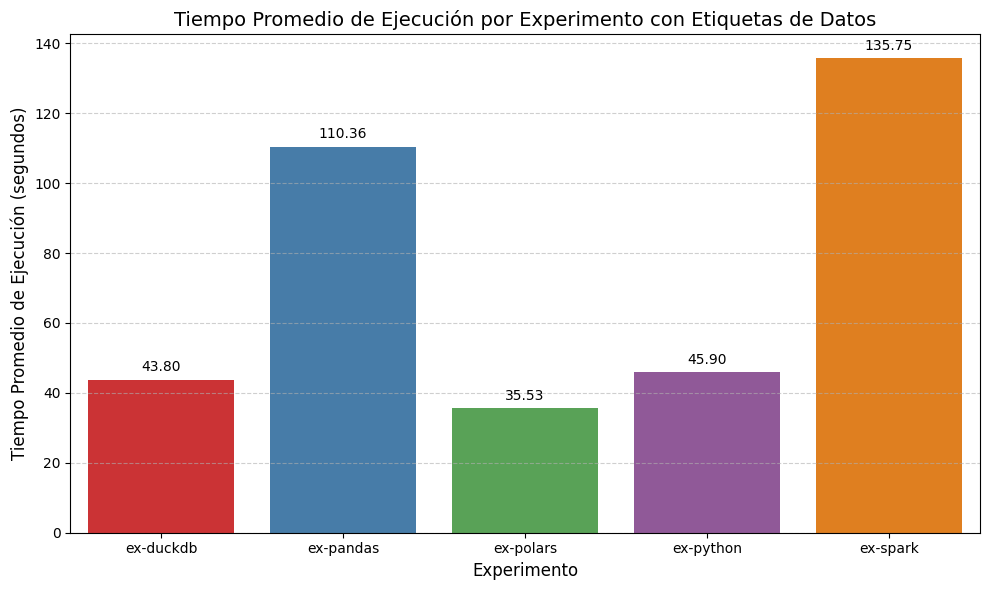

In [54]:
df_logs_actualizado = renombrar_columnas(df_logs_procesados)
generar_grafica_comparativa(df_logs_actualizado)

In [59]:
def preparar_datos_para_grafica(df):
    df = df.rename(columns={
        'Subcarpeta_1': 'experimento',
        'Subcarpeta_2': 'cantidad_registros',
        'Subcarpeta_3': 'gigabytes',
        'Execution time': 'tiempo_de_ejecucion'
    })

    df['tiempo_de_ejecucion'] = pd.to_numeric(df['tiempo_de_ejecucion'], errors='coerce')

    def limpiar_cantidad_registros(val):
        if pd.isna(val): return np.nan
        val_str = str(val).lower().strip()
        if val_str.endswith('k'):
            try: return float(val_str[:-1]) * 1000
            except ValueError: return np.nan
        try: return float(val_str)
        except ValueError: return np.nan

    df['cantidad_registros_num'] = df['cantidad_registros'].apply(limpiar_cantidad_registros)

    return df

In [62]:
def generar_graficas_por_experimento_barras(df):

    df_limpio = df.dropna(subset=['experimento', 'cantidad_registros_num', 'tiempo_de_ejecucion'])

    if df_limpio.empty:
        print("¡ALERTA! El DataFrame está vacío después de la limpieza. No se puede graficar.")
        return

    experimentos = df_limpio['experimento'].unique()
    num_experimentos = len(experimentos)

    cols = 2 if num_experimentos >= 2 else 1
    rows = int(np.ceil(num_experimentos / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(8 * cols, 6 * rows))

    axes_flat = axes.flatten()

    fig.suptitle('Tiempo Promedio vs. Cantidad de Registros por Experimento', fontsize=16, y=1.02)

    for i, exp in enumerate(experimentos):
        ax = axes_flat[i]

        df_exp = df_limpio[df_limpio['experimento'] == exp]

        df_promedio_exp = df_exp.groupby('cantidad_registros_num', as_index=False)['tiempo_de_ejecucion'].mean()

        # PALETA CAMBIADA A 'magma'
        sns.barplot(
            x='cantidad_registros_num',
            y='tiempo_de_ejecucion',
            data=df_promedio_exp,
            ax=ax,
            palette='magma',
            order=sorted(df_promedio_exp['cantidad_registros_num'].unique())
        )

        for p in ax.patches:
            ax.annotate(
                format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize = 8
            )

        ax.set_title(f'Experimento: {exp}', fontsize=12)
        ax.set_xlabel('Cantidad de Registros', fontsize=10)
        ax.set_ylabel('Tiempo Promedio (segundos)', fontsize=10)
        ax.grid(axis='y', linestyle=':', alpha=0.5)

    for j in range(num_experimentos, len(axes_flat)):
        fig.delaxes(axes_flat[j])

    plt.tight_layout(rect=[0, 0.03, 1, 0.98])

/tmp/ipython-input-3562418325.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3562418325.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3562418325.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3562418325.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3562418325.py:29: FutureWarning: 

Passin

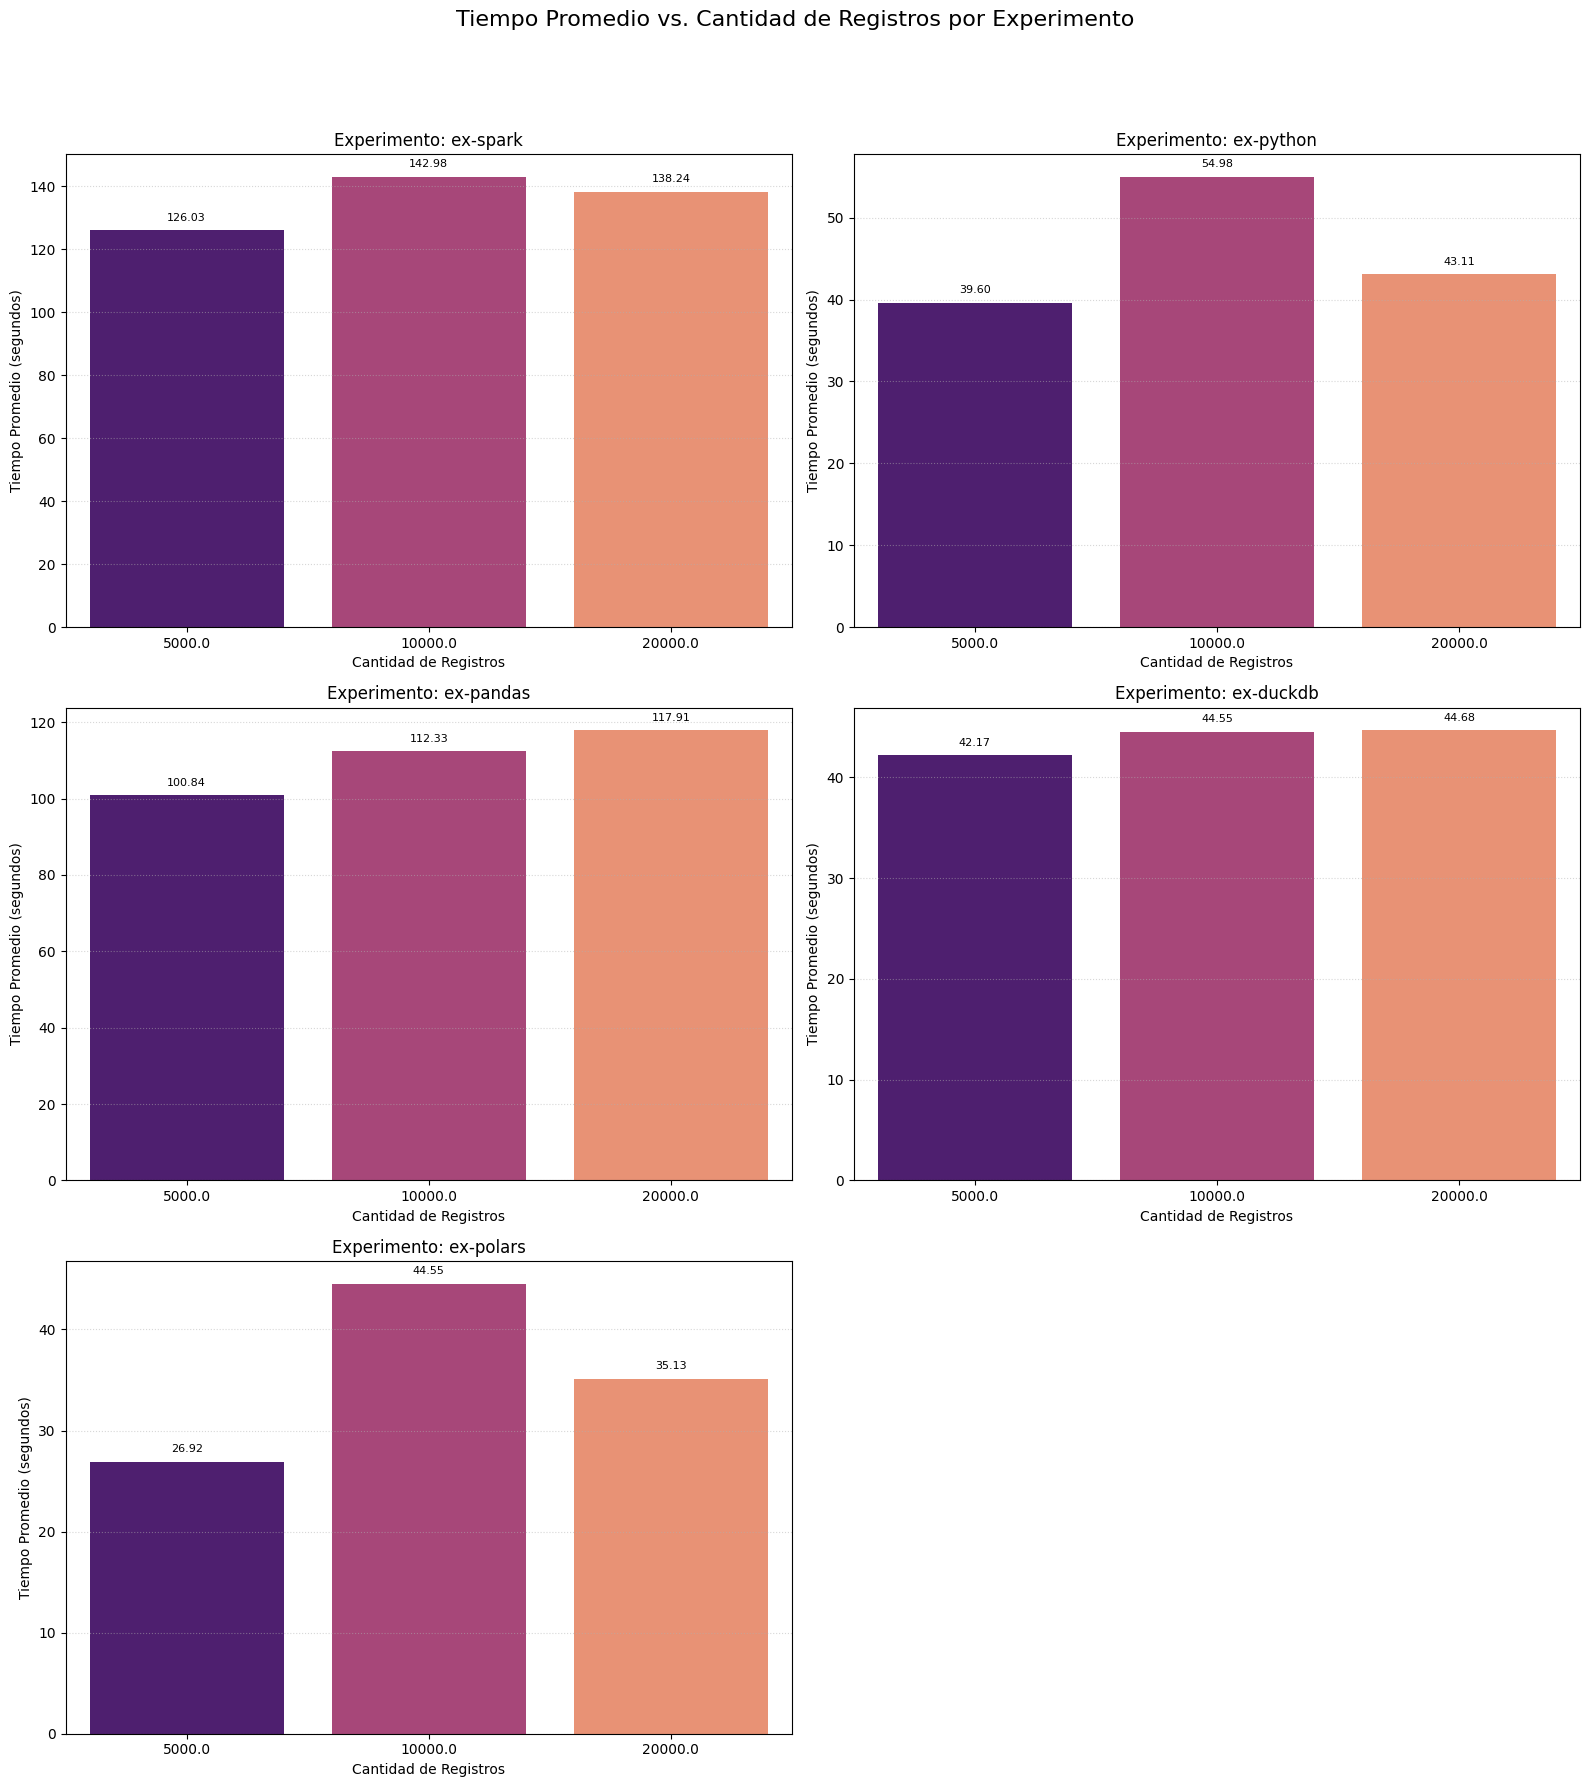

In [63]:
df_preparado = preparar_datos_para_grafica(df_logs_procesados)

generar_graficas_por_experimento_barras(df_preparado)

In [66]:
def calcular_medias_medianas(df):
    df['tiempo_de_ejecucion'] = pd.to_numeric(df['tiempo_de_ejecucion'], errors='coerce')

    resultados = df.groupby('experimento')['tiempo_de_ejecucion'].agg(['mean', 'median'])

    resultados = resultados.rename(columns={'mean': 'Tiempo_Medio (s)', 'median': 'Tiempo_Mediano (s)'})
    resultados = resultados.sort_values(by='Tiempo_Medio (s)', ascending=True)

    return resultados

In [65]:
resultados_finales = calcular_medias_medianas(df_preparado)

print("--- Medias y Mediana del Tiempo de Ejecución por Experimento ---")
print(resultados_finales)

--- Medias y Mediana del Tiempo de Ejecución por Experimento ---
             Tiempo_Medio (s)  Tiempo_Mediano (s)
experimento                                      
ex-polars           35.530260           31.261324
ex-duckdb           43.801314           43.972269
ex-python           45.896449           41.079698
ex-pandas          110.363285          110.130255
ex-spark           135.751266          144.142609


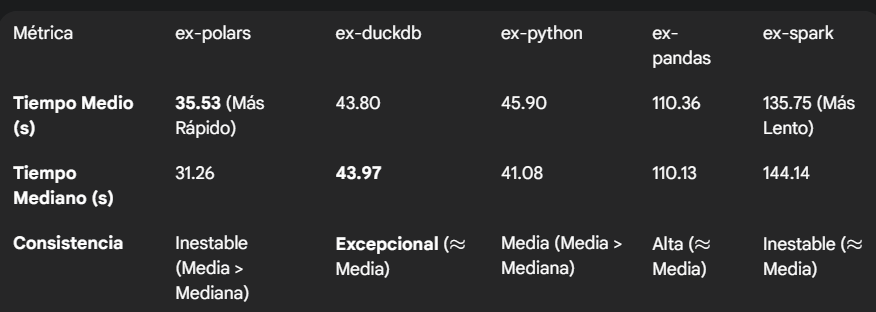

## Analisis de resultados:

**Análisis Escalabilidad:**

*   Líder en Consistencia: ex-duckdb mostró el mejor escalamiento. Su tiempo de ejecución es el más predecible y plano (baja variación) a través de todas las cargas de registros.

*   Velocidad Pura con Riesgo: ex-polars es el más rápido en promedio (35.53 s), pero junto a ex-python, su rendimiento es inestable. Ambos mostraron picos de latencia significativos en la carga de 10,000 registros, lo que infla su media.


*   Alto Overhead: ex-pandas y ex-spark son los más lentos, confirmando que su alto tiempo base y overhead de inicialización no son adecuados para este tipo de carga de trabajo.

**Análisis Consolidado de Rendimiento por Experimento:**

Este análisis combina el Tiempo Promedio General de Ejecución de todos los escenarios (5k, 10k, 20k registros) con la eficiencia de escalamiento observada.

1.   Desempeño Promedio Global (Gráfica de Barras):

El promedio global confirma el rendimiento base de cada herramienta a lo largo de todas las cargas de trabajo:


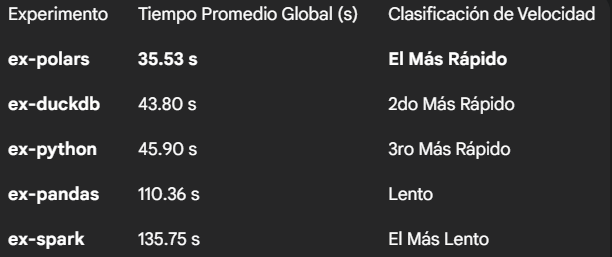

2. Integración con el Análisis de Escalabilidad
Al combinar la velocidad promedio con el comportamiento individual de las gráficas de escalamiento, se obtiene una recomendación robusta:


**Opciones con Rendimiento Óptimo (Tiempos < 46 s)**

ex-polars (Promedio: 35.53 s):
  *   Punto Fuerte: Velocidad promedio insuperable.

  *   Punto Débil: Su escalamiento es inestable, mostrando un pico de lentitud en la carga de 10,000 registros, lo que sugiere que hay un punto de inflexión o un cuello de botella que se resuelve en cargas mayores (20k).


ex-duckdb (Promedio: 43.80 s):
  *   Punto Fuerte: Consistencia excepcional. Es el motor más predecible, con una variación de tiempo mínima entre 5k y 20k registros. El tiempo de ejecución es casi plano.

  *   Punto Débil: Es ligeramente más lento que Polars en promedio.




ex-python (Promedio: 45.90 s):
*   Punto Fuerte: Es una alternativa rápida si las otras fallan.

*   Punto Débil: Al igual que Polars y Spark, presenta un pico de latencia en la carga de 10,000 registros, lo que reduce su confiabilidad en ese punto intermedio.
Opciones con Alto Overhead (Tiempos > 110 s)
ex-pandas (Promedio: 110.36 s):

El tiempo es 75 segundos más lento que Polars.

Muestra un crecimiento lineal en el tiempo de ejecución a medida que aumenta la carga, lo que confirma que su rendimiento base es lento y su escalabilidad es pobre.


ex-spark (Promedio: 135.75 s):
*   Es el motor más lento.
*   Su rendimiento se ve severamente afectado por el overhead de inicialización, resultando en un tiempo promedio muy alto y un pico extremo de lentitud en la carga de 10,000 registros.

**Recomendaciones:**

1.   Prioridad: Velocidad Pura: Seleccionar ex-polars. A pesar de su inestabilidad en 10k registros, su velocidad promedio es la mejor.
2.   Prioridad: Confiabilidad y Escalabilidad: Seleccionar ex-duckdb. Aunque es el segundo más rápido en promedio, ofrece el mejor escalamiento y la máxima previsibilidad de tiempo de ejecución.
3. Acción Requerida: Investigar la causa de los picos de latencia en la carga de 10,000 registros para ex-polars, ex-python, y ex-spark.

## Conclusiones:
Hallazgos Clave de Rendimiento (Velocidad y Consistencia):


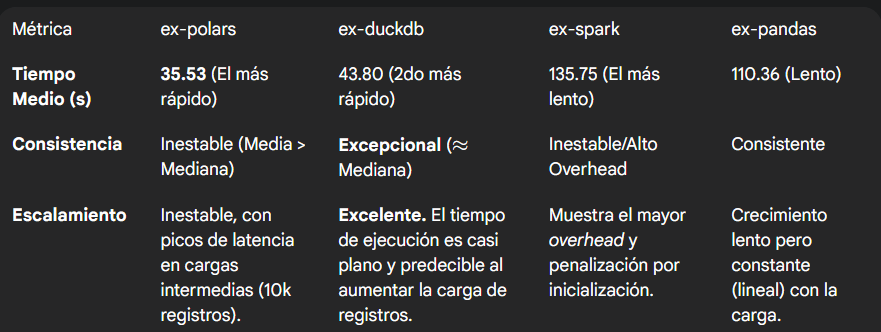

**Conclusión Principal:**

*   Rendimiento Óptimo: ex-polars es el motor más rápido en promedio (35.53 s) debido a su arquitectura eficiente (procesamiento columnar).

*   Motor Más Confiable: ex-duckdb es el más consistente, ofreciendo un excelente escalamiento y baja variabilidad, lo que lo hace el más predecible para cargas futuras.